# 4.2 Support Vector Machine

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

Suposse for the logistic regression model that given a fixed probability $p_0$ its necessary idenfy the regions in the feature space $p(\mathbf{x};\mathbf{\beta}) > p_0$.

$$
\begin{align*}
p_0 &= \frac{1}{1+e^{-(\beta_0+\beta_1 x_1 + \dots + \beta_p x_p)}} \\
ln\left(\frac{ p_0}{1-p_0}\right) & = \beta_0+\beta_1 x_1 + \dots + \beta_p x_p \\
0 & = - ln\left(\frac{ p_0}{1-p_0}\right) + \beta_0 +\beta_1 x_1 + \dots + \beta_p x_p\\
\end{align*}
$$

Then the logistic model splits the feature space in two regions.

$$
P_{p_0} = \{ \mathbf{x} \in \mathbb{R}^p : - ln\left(\frac{ p_0}{1-p_0}\right) + \beta_0 +\beta_1 x_1 + \dots + \beta_p x_p \geq 0 \} \\
N_{p_0} =\{ \mathbf{x} \in \mathbb{R}^p : - ln\left(\frac{ p_0}{1-p_0}\right) + \beta_0 +\beta_1 x_1 + \dots + \beta_p x_p < 0 \}
$$

Particularly for $p_0$= 0.5 the regions are:

$$P_{0.5} = \{ \mathbf{x} \in \mathbb{R}^p : \beta_0 +\beta_1 x_1 + \dots + \beta_p x_p \geq 0 \} \\
N_{0.5} =\{ \mathbf{x} \in \mathbb{R}^p : \beta_0 +\beta_1 x_1 + \dots + \beta_p x_p < 0 \}
$$

Although the logistic regression folds the feature space in to many different regions delimited by a decision boundary as hyperplanes, the logistic model dont provides the best threshold in order to find the best hyperplane that separates the populations. This motivates a new discriminant method known as suppor vector machine who principal objetive its try to determine the best hyperplane separator.


### Geometric margins
___

Lets the hyperplane H with equation $w_1 x_1 + \dots +w_p x_p + b = \mathbf{w'x}+b$. Consider a point $\mathbf{x} \in H$ and other $\mathbf{x_i} \in \mathbb{R}^p$ with label $y \in \{1,-1\}$ (1 if $\mathbf{x}$ belongs to positive class, -1 if $\mathbf{x}$ belongs to negative class) then the distance between the point $\mathbf{x_i}$ and H its given by:

<img src='static/proyection.png' width="40%" height="40%">

$$
\begin{align*}
d(\mathbf{x_i},H) &= || Proy_\mathbf{w} (\mathbf{x}-\mathbf{x_i}) || \\
 &= \frac{< \mathbf{w},(\mathbf{x}-\mathbf{x_i})>}{||\mathbf{w}||} \\
 &= \frac{w_1(x_{i1}-x_1)+\dots+w_p(x_{ip}-xp)}{||\mathbf{w}||} \\
 &= \frac{w_1x_{i1}-w_1x_1+\dots+w_px_{ip}-w_px_p}{||\mathbf{w}||} \\
 &= \frac{w_1x_{i1}+\dots+w_px_{ip}-w_1x_1-\dots-w_px_p}{||\mathbf{w}||} \\
&= \frac{w_1x_{i1}+\dots+w_px_{ip}+b}{||\mathbf{w}||} \\
d(\mathbf{x_i},H)  &=\frac{<\mathbf{w},\mathbf{x_i}>+b}{||\mathbf{w}||}
\end{align*}
$$

Lets deffine the geometric margin for the ith observation $\gamma_i$ as the oriented distance form the observation to the hyperplane such that if $\mathbf{x_i}$ its a positive obervation then the orginal distance its conserved but if $\mathbf{x_i}$ its a negative obervation then the distance have to change the sign to $-d(\mathbf{x_i},H)$. since $y_i$ contains this information the equation for gamma its given by:

<img src='static/margins.png' width="40%" height="40%">

$$\gamma_{\mathbf{x_i}} (\mathbf{w})= y_i \left(\frac{<\mathbf{w},\mathbf{x_i}>+b}{||\mathbf{w}||}\right) = y_i \left(\left(\frac{\mathbf{w'}}{||\mathbf{w}||}\right)\mathbf{x_i} + \frac{b}{||\mathbf{w}||} \right)$$


### Optimal margin discriminant
___

The optimal hyperplane its given by the $\mathbf{w} \in \mathbb{R}^p$ and $b \in \mathbb{R}$ such that:

$$
Max_{\mathbf{w},b} \left \{ Min_{\mathbf{x_i}} \left \{ \left(\frac{\mathbf{w'}}{||\mathbf{w}||}\right)\mathbf{x_i} + \frac{b}{||\mathbf{w}||} \right \} \right \} \\
s.t. sign(\gamma_{\mathbf{x_i}})=y_i
$$

Solve this problemm in general its complicated due to:

* The objective is nonlinear in two ways: the absolute value and the projection requires you to take a norm and * divide.
* The constraints are nonlinear due to the sign comparisons.
* There’s a min and a max! A priori, we have to do this because we don’t know which point is going to be the closest to the hyperplane.

**Reformulating the problem**

Consider 2 parallel hyperplanes $H_{1}$ and $H_{-1}$ with equations $w_1 x_1 + \dots +w_p x_p + b = 1$ and $w_1 x_1 + \dots +w_p x_p + b = -1$ conrrespondly and suposse there is not data observations between that planes.

**Definition**: If $\mathbf{z_0} \in H_{-1}$, the margin is the perpendicular distance between $\mathbf{z_0}$ and $H_1$ i.e. $m=d(\mathbf{z_0},H_1)$.

Contruct the following vector in same direction of $\mathbf{w}$ but with lenght m, $\mathbf{u} = m \frac{\mathbf{w}}{||\mathbf{w}||}$, this vector is orthogonal to booth hyperplanes let $\mathbf{z_0} \in H_{-1}$  and construct the vector

<img src='static/directors.png' width="40%" height="40%">

$$\mathbf{z_1}  = \mathbf{z_0}+m \frac{\mathbf{w}}{||\mathbf{w}||}$$


This vector lies on $H_1$ then

$$
\begin{align*}
\mathbf{w'z_1}+b &= 1 \\
\mathbf{w'}\left( \mathbf{z_0}+m \frac{\mathbf{w}}{||\mathbf{w}||} \right)+b &= 1 \\
\mathbf{w'}\mathbf{z_0}+b+m \frac{\mathbf{w'}\mathbf{w}}{||\mathbf{w}||}&= 1 \\
-1+m \frac{||\mathbf{w}||^2}{||\mathbf{w}||}+b &= 1\\
m||\mathbf{w}|| &= 2 \\
m &= \frac{2}{||\mathbf{w}||} \\
\end{align*}
$$


Since $0 < \frac{2}{||\mathbf{w}||} $ implies there is another parallel hyperplane  $H=\{\mathbf{x} \in \mathbb{R}^p : w_1 x_1 + \dots +w_p x_p + b = 0 \}$ such that the distance between that hyperplane to the others is exactly $\frac{1}{||\mathbf{w}||}$.  

**Definition**: The set of datapoints that lies on $H_1$ or $H_{-1}$ are called the support vectors of H.

$$SV(H) = \{ x_i \in \mathbb{R}^p : \mathbf{w'x_i}+b=1 \lor \mathbf{w'x_i}=-1\}$$

<img src='static/supportVectors.png' width="40%" height="40%">

This means that maximizing the margin is the same that minimizing the norm of the weights. Note that the discriminant classify correctly a vector when $y_i (\mathbf{w'x_i}+b) \geq 1 $

So the primal problem consists in to:

$$
Max_{\mathbf{w},b} \left \{ \frac{2}{||\mathbf{w}||} \right \}\\ 
s.t. y_i (\mathbf{w'x_i}+b) \geq 1 
$$

The dual formulation for the optimization problem is:

$$
Min_{\mathbf{w},b} \left \{ \frac{||\mathbf{w}||^2}{2} \right \}\\ 
s.t. y_i (\mathbf{w'x_i}+b) \geq 1 
$$

This is a constrained optimization problem it can be solved by the **Lagrangian multipler** method because it is quadratic, the surface is a hyperparaboloid, with just a single global minimum. in general the Lagraninan objetive functions its given by:

$$\mathcal{L}(\mathbf{x,\alpha})=f(\mathbf{x})-\sum_{i=1}^n \alpha_i g_i (\mathbf{x})$$

In this case $f(\mathbf{w},b):=\frac{||\mathbf{w}||^2}{2}$ and $g_i(\mathbf{w},\alpha):= \alpha_i (y_i (\mathbf{w'x_i}+b)-1)$ st. $\alpha_i \geq 0$, so the Lagraninan objetive function is:

$$\mathcal{L}(\mathbf{w},b,\mathbf{\alpha})= \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1)$$

The problem consist into:

$$
Min_{\mathbf{w},b} \left \{ Max_{\alpha_i \geq 0} \left \{ \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1) \right \} \right \}\\ 
$$

Slater’s condition from convex optimization guarantees that its possible swap the Min and Max problems:

$$
Min_{\mathbf{w},b} \left \{ Max_{\alpha_i \geq 0} \left \{ \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1) \right \} \right \} = Max_{\alpha_i \geq 0} \left \{ Min_{\mathbf{w},b} \left \{ \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1) \right \} \right \}\\ 
$$

This implies is possible solve for optimal $\mathbf{w}$, b and then put it as function of $\mathbf{\alpha}$. Computing the partial derivates:

$$
\begin{cases}
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w_j} &=  \frac{\partial}{\partial w_j} \left( \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1)  \right) = 0\\
\frac{\partial \mathcal{L}}{\partial b} &=  \frac{\partial}{\partial b} \left( \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1)  \right) = 0\\
\end{align*}
\end{cases}
$$

Computing the partial derivates for some entrie $w_j$ of $\mathbf{w}$:

$$
\begin{align*}
\frac{\partial}{\partial w_j} \left( \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i \left(y_i \left(\mathbf{w'x_i}+b\right)-1\right)  \right) &= \frac{\partial}{\partial w_j} \left( \frac{1}{2} \sum_{k=1}^p w_i^2 -\sum_{i=1}^n \alpha_i \left(y_i \left(\sum_{k=1}^p w_k x_{ik} +b\right)-1\right)  \right) \\
&= \frac{\partial}{\partial w_j} \left( \frac{1}{2} \sum_{k=1}^p w_i^2  -\sum_{i=1}^n \sum_{k=1}^p \alpha_i y_i w_k x_{ik}-\sum_{i=1}^n \alpha_i y_i b + \sum_{i=1}^n \alpha_i \right) \\
&= \frac{1}{2} \sum_{k=1}^p \frac{\partial}{\partial w_j} \left( w_i^2  \right) -\sum_{i=1}^n \sum_{k=1}^p \frac{\partial}{\partial w_j} ( \alpha_i y_i w_k x_{ik})-\sum_{i=1}^n \frac{\partial}{\partial w_j} ( \alpha_i y_i b ) + \sum_{i=1}^n \frac{\partial}{\partial w_j} ( \alpha_i ) \\
&= w_j -\sum_{i=1}^n  \alpha_i y_i x_j\\
\end{align*}
$$

Solving for $w_j$

$$
w_j -\sum_{i=1}^n  \alpha_i y_i x_j = 0 \implies w_j = \sum_{i=1}^n  \alpha_i y_i x_j \implies \mathbf{w} = \sum_{i=1}^n  \alpha_i y_i \mathbf{x_i}
$$

Computing the partial derivates for the intercepto $b$:


$$
\begin{align*}
\frac{\partial}{\partial b} \left( \frac{\mathbf{w'w}}{2}-\sum_{i=1}^n \alpha_i \left(y_i \left(\mathbf{w'x_i}+b\right)-1\right)  \right) &= \frac{1}{2} \sum_{k=1}^p \frac{\partial}{\partial b} \left( w_i^2  \right) -\sum_{i=1}^n \sum_{k=1}^p \frac{\partial}{\partial b} ( \alpha_i y_i w_k x_{ik})-\sum_{i=1}^n \frac{\partial}{\partial b} ( \alpha_i y_i b ) + \sum_{i=1}^n \frac{\partial}{\partial b} ( \alpha_i ) \\
&= -\sum_{i=1}^n  \alpha_i y_i \\
\end{align*} \\
\implies -\sum_{i=1}^n  \alpha_i y_i  = 0 \implies \sum_{i=1}^n  \alpha_i y_i  = 0
$$

By substituting for $\mathbf{w}$ and $b$ back in the original equations its possible get rid of the dependence on $\mathbf{w}$ and $b$.

$$
\begin{align*}
\mathcal{L}(\mathbf{w},b,\mathbf{\alpha})&=\frac{||\mathbf{w}||^2}{2}-\sum_{i=1}^n \alpha_i y_i (\mathbf{w'x_i}+b)+\sum_{i=1}^n \alpha_i\\
&= \frac{1}{2} \langle  \sum_{i=1}^n  \alpha_i y_i \mathbf{x_i} , \sum_{j=1}^n  \alpha_j y_j \mathbf{x_j} \rangle -\sum_{i=1}^n \alpha_i y_i \langle \mathbf{w,x_i} \rangle + \sum_{i=1}^n \alpha_i y_i b +\sum_{i=1}^n \alpha_i\\
&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n  \langle    \alpha_i y_i \mathbf{x_i} ,  \alpha_j y_j \mathbf{x_j} \rangle -\sum_{i=1}^n \alpha_i y_i \langle \sum_{i=j}^n  \alpha_j y_j \mathbf{x_j}, \mathbf{x_i} \rangle + b \sum_{i=1}^n \alpha_i y_i  +\sum_{i=1}^n \alpha_i\\
&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \langle \alpha_i y_i \mathbf{x_i}, \alpha_j y_j \mathbf{x_j} \rangle -\sum_{i=1}^n \sum_{i=j}^n \alpha_i y_i \langle  \alpha_j y_j \mathbf{x_j}, \mathbf{x_i} \rangle +\sum_{i=1}^n \alpha_i \\
&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \langle \alpha_i y_i \mathbf{x_i}, \alpha_j y_j \mathbf{x_j} \rangle -\sum_{i=1}^n \sum_{i=j}^n \langle  \alpha_j y_j \mathbf{x_j}, \alpha_i y_i \mathbf{x_i} \rangle +\sum_{i=1}^n
\alpha_i\\
\mathcal{L}(\mathbf{\alpha}) &= - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \langle \alpha_i y_i \mathbf{x_i}, \alpha_j y_j \mathbf{x_j} \rangle +\sum_{i=1}^n \alpha_i\\
\end{align*}
$$

$$
Max_{\alpha_i \geq 0} \left \{ \mathcal{L}(\mathbf{\alpha}) = - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \langle \alpha_i y_i \mathbf{x_i}, \alpha_j y_j \mathbf{x_j} \rangle +\sum_{i=1}^n\alpha_i \right \}\\ 
$$

Lets $\mathbf{\alpha^*}=(\alpha_1^*,...,\alpha_n^*)$ the critical points for $\mathcal{L}(\mathbf{\alpha})$ and recalling from the original discriminant $y_i = \langle \mathbf{x_i,w}\rangle +b$, the critical $\mathbf{w^*},b^*$ are:

$$
\mathbf{w^*} = \sum_{i=0}^n \alpha_i^* y_i \mathbf{x_i} \quad b^* = y_k - \langle \mathbf{w,x_k} \rangle = y_k - \langle \sum_{i=0}^n \alpha_i^* y_i \mathbf{x_i},\mathbf{x_k} \rangle
$$

For some $\mathbf{x_k} \in SV(H)$ and their associated label $y_k$. Now, replacing the critical values in the original discriminant equation, the estimated $\hat{y_i}$ its given by:

$$
\begin{align*}
\hat{y_i} &= \langle \mathbf{x,w^*}\rangle +b^* \\ 
&= \langle \mathbf{x},\sum_{i=0}^n \alpha_i^* y_i x_i\rangle+y_k - \langle \mathbf{w,x_k} \rangle\\
&= \langle \mathbf{x}, \sum_{i=0}^n \alpha_i^* y_i \mathbf{x_i} \rangle+y_k - \langle \sum_{i=0}^n \alpha_i^* y_i \mathbf{x_i},\mathbf{x_k} \rangle \\
\hat{y_i}(\mathbf{x}) &= \sum_{i=0}^n \alpha_i^* y_i \langle \mathbf{x}, \mathbf{x_i} \rangle+y_k - \sum_{i=0}^n \alpha_i^* y_i \langle \mathbf{x_i},\mathbf{x_k} \rangle \\
\end{align*}
$$

Note that this estimator, derives a natural desicion rule for some $\mathbf{x} \in \mathbb{R^p}$ :

$$
Label(\mathbf{x}) = 
\begin{cases}
\begin{align*}
1 \quad if \quad  sign(\hat{y_i}(\mathbf{x})) > 0 \\
-1 \quad  if \quad  sign(\hat{y_i}(\mathbf{x})) < 0\\
\end{align*}
\end{cases}
$$

## Non Separable Case
___

When two populations are not separable, its possible consider a new non negative random variable (*The Slack variable*) $\varepsilon$, such that so that this variable displaces a vector from the correct side of the margin to the wrong side.

<img src='static/nonseparablepopulations.png' width="40%" height="40%">

When the examples are not linearly separable we can modify the optimization problem slightly to add a penalty for violating the classification constraints:

$$y_i (\mathbf{w'x_i}+b) \geq 1 -\varepsilon_i$$

Where $\varepsilon_i$ is the measure of deviation form the ideal for sample $\mathbf{x}_i$, note that:

* If $\varepsilon_i \geq 1$ then $\mathbf{x}_i$ is on the wrong side of the separating hyperplane. 
* If $\varepsilon_i \leq 1$ then $\mathbf{x}_i$ is on the correct side of the separating hyperplane. 
* If $0 \leq \varepsilon_i \leq 1$ then $\mathbf{x}_i$ on the wrong side of the separating hyperplane but betwen the margins $H_1$ and $H_{-1}$. 

Lets $\mathbf{\varepsilon}=(\varepsilon_1,...,\varepsilon_n)$ the slacks sociated to training vectors $(\mathbf{x}_1,...,\mathbf{x}_n)$ and $\lambda \in \mathbb{R^⁺}$ a non negative constant called the penalty parameter, then the dual formulation for the optimization problem for the non separable case is given by:

$$
Min_{\mathbf{w},b} \left \{ \frac{||\mathbf{w}||^2}{2} + \lambda \sum_{i=1}^n \varepsilon_i \right \}\\ 
s.t. y_i (\mathbf{w'x_i}+b) - \varepsilon_i \geq 1 
$$

The **Lagrangian multipler** asociated to this constrained optimization problem its:


$$\mathcal{L}(\mathbf{w},b,\mathbf{\alpha})= \frac{\mathbf{w'w}}{2}+\lambda \sum_{i=0}^n \varepsilon_i -\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1+\varepsilon_i)-\sum_{i=1}^n \mu_i \varepsilon_i$$


### Karush Kuhn Tucker conditions

___

Thus, the corresponding KKT conditions are as following:
* First KKT conditions:
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}}=\mathbf{w}-\sum_{i=1}^n \alpha_iy_i\mathbf{x}_i=0\\
\frac{\partial \mathcal{L}}{\partial b}=\sum_{i=1}^n \alpha_iy_i=0 \\
\frac{\partial J}{\partial \varepsilon_i} = \lambda -\alpha_i-\mu_i=0 \\
$$

* Second KKT conditions:

$$
y_i (\langle \mathbf{w,x}_i\rangle+b) \geq 1-\varepsilon_i \quad \varepsilon_i \geq 0 \\
$$

* Third KKT conditions:
$$
\alpha_i(\langle \mathbf{w,x}_i\rangle+b)-1+\varepsilon_i)=0 \quad \mu_i \varepsilon_i =0\\
$$


Since $\lambda-\alpha_i-\mu_i=0 \implies 0 \leq \alpha_i \leq \lambda$:

* If $\alpha_i = 0$, then $\mu_i=\lambda > 0$ so 
     
     $\varepsilon_i = 0$ and $y_i (\langle \mathbf{w,x}_i\rangle+b)-1+\varepsilon_i >0$ 
     
     therefore $y_i (\langle \mathbf{w,x}_i\rangle+b)>1-\varepsilon_i=1 \implies y_i (\langle \mathbf{w,x}_i\rangle+b) > 1$

* If $0 < \mu_i < \lambda$, then $0 < \mu_i<\lambda > 0$ so 

    $\varepsilon_i = 0$ and $y_i (\langle \mathbf{w,x}_i\rangle+b)-1+\varepsilon_i =0$ 

    therefore $y_i (\langle \mathbf{w,x}_i\rangle+b)=1-\varepsilon_i=1 \implies y_i (\langle \mathbf{w,x}_i\rangle+b) = 1$

* $\alpha_i = \lambda $, then $\mu_i = 0$ so 

    $\varepsilon_i > 0$ and $y_i (\langle \mathbf{w,x}_i\rangle+b)-1+\varepsilon_i =0$ 
    
    therefore $y_i (\langle \mathbf{w,x}_i\rangle+b)=1-\varepsilon_i<1 \implies y_i (\langle \mathbf{w,x}_i\rangle+b) < 1$

In conclusion, the support vectors are the samples on the margin or in the margin area. And finaly the dual form of the optimization problem with the derived restrictions is:

$$
Max_{\alpha_i \geq 0} \left \{ \mathcal{L}(\mathbf{\alpha}) =  \frac{\mathbf{w'w}}{2}+\lambda \sum_{i=0}^n \varepsilon_i -\sum_{i=1}^n \alpha_i (y_i (\mathbf{w'x_i}+b)-1+\varepsilon_i)-\sum_{i=1}^n \mu_i \varepsilon_i \right \}\\ 
s.t. \quad 0 \leq \alpha_i \leq \lambda \quad \sum_{i=1}^n \alpha_i y_i = 0\\
$$

Lets $\mathbf{\alpha^*}=(\alpha_1^*,...,\alpha_n^*)$ the critical points for $\mathcal{L}(\mathbf{\alpha})$ the solution for $\mathbf{w^*},b^*$ is the same of the separable case but with the restriction of $\lambda$ on $\alpha_i$.

## Non linear separability and kernel tricks
___

Frequently, in the discriminant techniques it is assumed that among the populations there is a linear imaginary border in the form of hyperplanes that helps to separate in the space of carcateristicas in two or more regions in which one population predominates more than the other, however in practice this in general is not true, there are many occasions in which the separation frontier (desicion) is something more complicated than a hyperplane. For example, the follwing code generates a set of data points no linearity separables (the populations could not be separeted with only just one hyperplane). It is not difficult to see that a correct circumference separates the data without many problems:

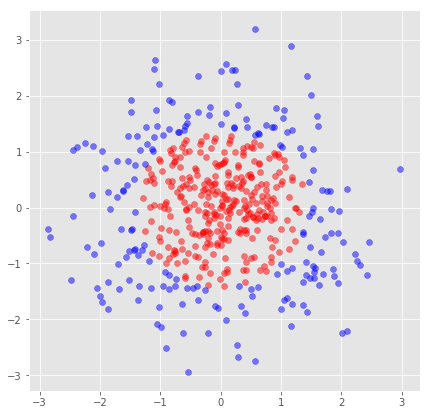

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from numpy import random as ran
from scipy.stats import norm
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
p = 2
n = 500
Z = pd.DataFrame([[norm.ppf(ran.uniform()) for i in range(0,p)] for i in range(0,n)],\
                 columns=['x_'+str(i+1)for i in range(0,p)])
Zn=Z[Z['x_1']**2+Z['x_2']**2>=2]
Zp=Z[Z['x_1']**2+Z['x_2']**2<=2]
figure(num=None,figsize=(7,7))
plt.scatter(Zp['x_1'],Zp['x_2'],color='red',alpha=0.5)
plt.scatter(Zn['x_1'],Zn['x_2'],color='blue',alpha=0.5)
plt.show()

However there are many possible curves candidates to be a good decision boundary depending of the configrations of the data in the feature space, however is too much complicated rethink each model for each possible curve. So we opt for the other alternative that consists of giving a transformation of the space of characteristics to another one so that when transforming is applied to data (deforming the space), the data are linearly separable. 

**Example:** Consider the following transformation:

$$
\begin{align*}
T&:\mathbb{R^2} \mapsto \mathbb{R^3}\\
T \left (
\begin{bmatrix}
x_{1} \\
x_{2} \\
\end{bmatrix}
\right) &= 
\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{2}^2+x_{2}^2\\
\end{bmatrix}
\end{align*}
$$

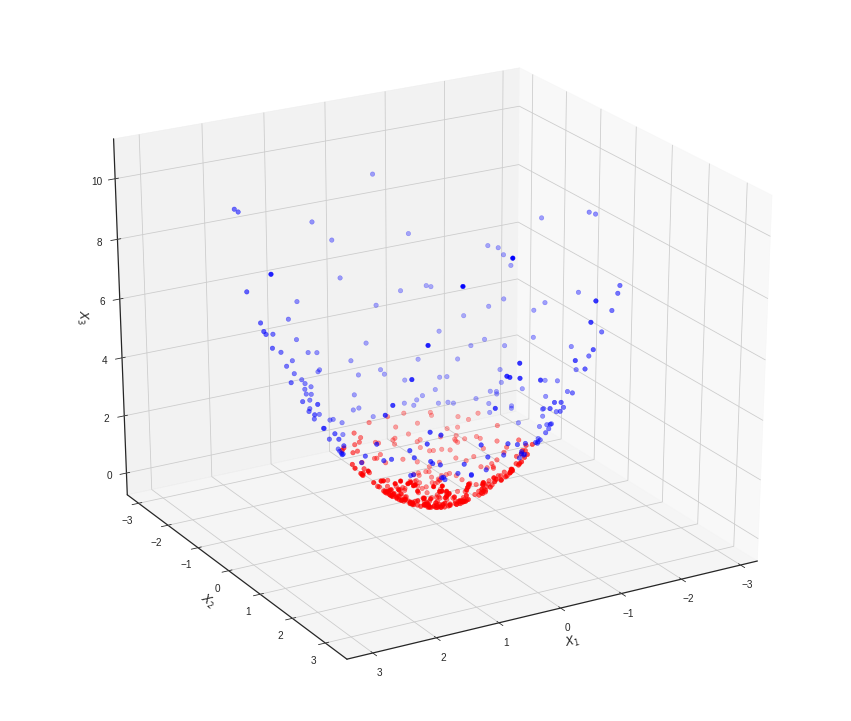

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
Zn['x_3'] = Zn['x_1']**2+Zn['x_2']**2
Zp['x_3'] = Zp['x_1']**2+Zp['x_2']**2
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Zp['x_1'],Zp['x_2'],Zp['x_3'], c='red')
ax.scatter(Zn['x_1'],Zn['x_2'],Zn['x_3'], c='blue')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$X_3$')
ax.view_init(25,60)
plt.show()